1. ***PROJECT SET UP*** 

 Optimal Used Car Pricing and Recommendation System

1.1. Introduction

In the rapidly growing used car market, customers often struggle to evaluate a fair price for a used vehicle. This project leverages machine learning to predict optimal car prices based on factors such as mileage, age, fuel type, and region. Additionally, a recommendation feature will suggest similar cars based on user preferences, streamlining the decision-making process for buyers.

1.2. Problem Statement

The used car market lacks transparency, and prices can vary significantly by location, condition, and brand. Buyers and sellers need reliable price predictions and car recommendations to make informed choices. This project aims to:

•	Predict used car prices accurately.

•	Offer similar car recommendations based on user input.

•	Provide region-specific insights to optimize pricing strategies.

1.3. Objectives

Main Objective:

To create a machine-learning-driven system that provides accurate price predictions and car recommendations, enhancing user trust and satisfaction.

Specific Objectives:

•	Predict optimal car prices using machine learning.

•	Recommend similar cars based on user-defined parameters.

•	Provide regional pricing insights to optimize listing strategies.

•	Build a dashboard for easy interaction and visualization of predictions and recommendations.

1.4. Data Sources

•	Internal Data: our provided used car datasets, segmented by region and containing various attributes.

•	External Data (Optional): Public sources like Kaggle’s car dataset to expand data diversity (if desired).

•	Web Scraped Data: Additional data scraped from online used car listings for enhancing model accuracy.

1.5. Proposed Solution

This project will be divided into key stages to optimize the pricing prediction and recommendation processes:


2. ***INITIAL DATA EXPLORATION***

2.1. Preview the Data
•	Consolidating the datasets 


In [937]:
# Importing Required libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')


In [938]:
# Load individual region data files
Ahmedabad_data = pd.read_csv('Ahmedabad.csv')
Banglore_data = pd.read_csv('Banglore.csv')
Car_data = pd.read_csv('Car_data.csv')
Chennai_data = pd.read_csv('Chennai.csv')
Gurgaon_data = pd.read_csv('Gurgaon.csv')
Hyderabad_data = pd.read_csv('Hyderabad.csv')
Jaipur_data = pd.read_csv('Jaipur.csv')
Kolkata_data = pd.read_csv('Kolkata.csv')
Mumbai_data = pd.read_csv('Mumbai.csv')
Pune_data = pd.read_csv('Pune.csv')

# Combine all the data into one DataFrame
combined_data = pd.concat([Ahmedabad_data, Banglore_data, Car_data, Chennai_data, Gurgaon_data, Hyderabad_data, Jaipur_data, Kolkata_data, Mumbai_data, Pune_data], ignore_index=True)

# Renaming combined data for simplicity
Data = combined_data


In [939]:
# Check the shape of the Data
print(Data.shape)


(10394, 21)


In [940]:
Data.head()


,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Seats,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price
0,0,2020 Maruti Swift Dzire,2019,Petrol,"11,935 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,Grey,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,80,000"
1,1,2016 Nissan Terrano,2016,Diesel,"74,555 Kms",1461 cc,2nd Owner,Manual,20.45 kmpl,83.8bhp,...,5,Black,5 Speed,FWD,Power,Disc,Drum,14 Seconds,K9K Diesel Engine,"4,70,500"
2,2,2020 Maruti Swift Dzire,2019,Petrol,"9,379 Kms",1197 cc,1st Owner,Manual,21.21 kmpl,81.80bhp,...,5,White,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,"6,75,000"
3,3,2018 Maruti Swift,2018,Diesel,"31,824 Kms",1248 cc,1st Owner,Manual,28.4 kmpl,74bhp,...,5,Red,5,FWD,Power,Disc,Drum,NaN,DDiS 190 Engine,"6,00,000"
4,4,2017 Maruti Baleno,2017,Petrol,"49,072 Kms",1197 cc,1st Owner,Manual,21.01 kmpl,81.80bhp,...,5,Blue,5 Speed,FWD,Electric,Disc,Drum,12.36 seconds,1.2L VVT Engine,"6,10,000"


Inspecting the Data: Check data types, null values, and the general structure of the dataset.

In [941]:
Data.info()  # Shows data types and missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10394 entries, 0 to 10393
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10394 non-null  int64 
 1   Brand                10394 non-null  object
 2   Make_Year            10394 non-null  int64 
 3   Fuel                 10394 non-null  object
 4   KMs_Driven           10394 non-null  object
 5   Engine_Displacement  10394 non-null  object
 6   No_Of_Owner          10394 non-null  object
 7   Transmission         10394 non-null  object
 8   Mileage              10394 non-null  object
 9   Max_Power            10394 non-null  object
 10  Torque               10394 non-null  object
 11  Seats                10394 non-null  int64 
 12  Color                10394 non-null  object
 13  Gear_Box             10386 non-null  object
 14  Drive_Type           10208 non-null  object
 15  Steering_Type        10344 non-null  object
 16  Fron

**DataFrame Summary**

Total Entries: 10,394 rows (indexed from 0 to 10,393).

Total Columns: 21 columns.

**Column Details**

**Data Types:**

int64: 3 columns (e.g., Unnamed: 0, Make_Year, Seats).

object: 18 columns (e.g., Brand, Fuel, KMs_Driven, etc.).

**Non-Null Counts**

Most columns have 10,394 non-null entries, indicating no missing values.

Some columns have missing values:

Gear_Box: 10,386 non-null entries.

Drive_Type: 10,208 non-null entries.

Steering_Type: 10,344 non-null entries.

Front_Brake_Type: 10,346 non-null entries.

Rear_Brake_Type: 10,346 non-null entries.

Acceleration: 9,320 non-null entries.

Engine_Type: 5,144 non-null entries.


**Conclusion**
The DataFrame contains a mix of integer and object data types, with some columns having missing values. Most columns are fully populated, while a few require attention for missing data.

In [942]:
# Drop columns that aren't necessary for the analysis
Data = Data.drop(columns=['Unnamed: 0'])


In [943]:
# Cleaning numeric columns stored as strings
Data['KMs_Driven'] = pd.to_numeric(Data['KMs_Driven'].astype(str).str.replace(r'[^0-9.]', '', regex=True))
Data['Engine_Displacement'] = pd.to_numeric(Data['Engine_Displacement'].astype(str).str.replace(r'[^0-9.]', '', regex=True))
Data['Mileage'] = pd.to_numeric(Data['Mileage'].astype(str).str.replace(r'[^0-9.]', '', regex=True))
Data['Max_Power'] = pd.to_numeric(Data['Max_Power'].astype(str).str.replace(r'[^0-9.]', '', regex=True))
Data['Price'] = pd.to_numeric(Data['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True))


In [944]:
# Convert selected columns to 'category' type
categorical_columns = ['Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type', 
                       'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type']
Data[categorical_columns] = Data[categorical_columns].astype('category')


In [945]:
# Identify numeric columns
numeric_columns = Data.select_dtypes(include=['int64', 'float64']).columns

# Impute missing numeric values using the median
numeric_imputer = SimpleImputer(strategy='median')
Data[numeric_columns] = numeric_imputer.fit_transform(Data[numeric_columns])

# For categorical columns, impute using the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
Data[categorical_columns] = categorical_imputer.fit_transform(Data[categorical_columns])


In [946]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10394 entries, 0 to 10393
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                10394 non-null  object 
 1   Make_Year            10394 non-null  float64
 2   Fuel                 10394 non-null  object 
 3   KMs_Driven           10394 non-null  float64
 4   Engine_Displacement  10394 non-null  float64
 5   No_Of_Owner          10394 non-null  object 
 6   Transmission         10394 non-null  object 
 7   Mileage              10394 non-null  float64
 8   Max_Power            10394 non-null  float64
 9   Torque               10394 non-null  object 
 10  Seats                10394 non-null  float64
 11  Color                10394 non-null  object 
 12  Gear_Box             10394 non-null  object 
 13  Drive_Type           10394 non-null  object 
 14  Steering_Type        10394 non-null  object 
 15  Front_Brake_Type     10394 non-null 

In [947]:
Data.shape

(10394, 20)

In [948]:
#Checking Available Columns

Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type',
       'Price'],
      dtype='object')

**Initial EDA**

Visualizations: To create plots to visualize relationships between features and the target variable (e.g., price).

To understand distributions, correlations, and trends in the data.

Feature Importance: Identify which features are most important for predicting the target variable.

In [949]:
# Display summary statics
Data.describe()

,Make_Year,KMs_Driven,Engine_Displacement,Mileage,Max_Power,Seats,Price
count,10394.000000,1.039400e+04,10394.000000,10394.000000,1.039400e+04,10394.000000,1.039400e+04
mean,2014.891861,5.907608e+04,1378.699779,23.096142,1.507907e+03,5.188378,4.310083e+05
std,3.094559,5.005597e+04,456.923011,29.798771,3.637516e+04,0.653699,6.201440e+05
min,1995.000000,2.010000e+02,5.000000,0.000000,0.000000e+00,2.000000,1.000000e+00
25%,2013.000000,3.249200e+04,1197.000000,17.600000,7.242000e+01,5.000000,9.662500e+00
50%,2015.000000,5.400000e+04,1199.000000,20.000000,8.310000e+01,5.000000,3.538500e+05
75%,2017.000000,7.703800e+04,1498.000000,22.540000,1.035000e+02,5.000000,5.500000e+05
max,2021.000000,2.150000e+06,5461.000000,1197.000000,1.186600e+06,9.000000,9.500000e+06


*The dataset includes information on 5,197 vehicles, with the following key statistics:*

Make Year: The average vehicle age is 2014, ranging from 1995 to 2021.

KMs Driven: The average mileage is 59,076 km, with a wide range from 200 km to over 2 million km.

Engine Displacement: The mean engine displacement is 1,378 cc, with a standard deviation of 457 cc, indicating a mix of small and large engines.

Number of Owners: There are up to 5,461 owners, with values skewed toward lower numbers of ownership.

Mileage: Average mileage is 25.88 km/l, with a significant spread from 0 to 260 km/l.

Max Power: The average power is 92.13 HP, ranging from 0 to 469 HP.

Seats: Most vehicles have 5 seats, though some models have up to 9.

Price: The average price is approximately ₹675,948, with prices ranging from ₹45,000 to ₹9.5 million.

3. ***DATA PREPROCESSING AND CLEANING***

In [950]:
# Remove duplicates
Data = Data.drop_duplicates()


In [951]:
#Handling Missing Data

In [952]:
# Check for missing values in the original DataFrame
print(Data.isnull().sum())


Brand                    0
Make_Year                0
Fuel                     0
KMs_Driven               0
Engine_Displacement      0
No_Of_Owner              0
Transmission             0
Mileage                  0
Max_Power                0
Torque                   0
Seats                    0
Color                    0
Gear_Box                 0
Drive_Type               0
Steering_Type            0
Front_Brake_Type         0
Rear_Brake_Type          0
Acceleration           828
Engine_Type              0
Price                    0
dtype: int64


In [953]:
Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type',
       'Price'],
      dtype='object')

In [954]:
# Identify numeric columns
numeric_columns = Data.select_dtypes(include=['int64', 'float64']).columns

# Print numeric columns
print("Numeric Columns:", numeric_columns)


Numeric Columns: Index(['Make_Year', 'KMs_Driven', 'Engine_Displacement', 'Mileage',
       'Max_Power', 'Seats', 'Price'],
      dtype='object')


In [955]:
# Identify categorical columns
categorical_columns = Data.select_dtypes(exclude=['int64', 'float64']).columns

# Print categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Brand', 'Fuel', 'No_Of_Owner', 'Transmission', 'Torque', 'Color',
       'Gear_Box', 'Drive_Type', 'Steering_Type', 'Front_Brake_Type',
       'Rear_Brake_Type', 'Acceleration', 'Engine_Type'],
      dtype='object')


In [956]:
# Step 1: Handle Missing Data
# For numeric columns, impute using the median
numeric_imputer = SimpleImputer(strategy='median')
Data[numeric_columns] = numeric_imputer.fit_transform(Data[numeric_columns])

# For categorical columns, impute using the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
Data[categorical_columns] = categorical_imputer.fit_transform(Data[categorical_columns])


In [957]:
# Step 2: Drop Unnecessary Columns
Data.drop(columns=['Unnamed: 0', 'url'], inplace=True, errors='ignore')


In [958]:
# Step 3: Remove Duplicates
Data = Data.drop_duplicates()

In [959]:
Data['Make_Year'] = Data['Make_Year'].astype(int)


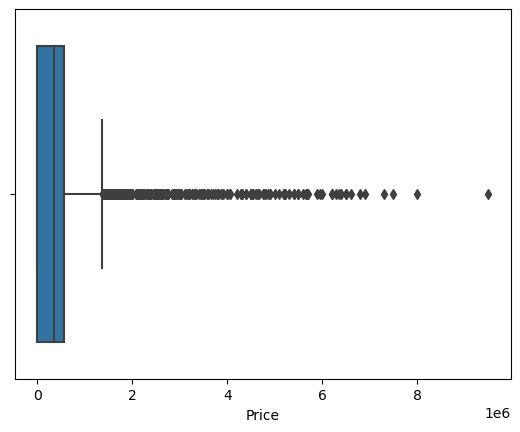

In [960]:
#Detecting Outliers
sns.boxplot(x=Data['Price'])
plt.show()


In [961]:
Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type',
       'Price'],
      dtype='object')

In [962]:
# Step 5: # Feature Engineering: Add new useful features
Data['Car_Age'] = 2024 - Data['Make_Year']
Data['Price_per_Km'] = Data['Price'] / Data['KMs_Driven']


In [963]:
# Handling Outliers
# Outlier Detection using IQR (Interquartile Range)
Q1 = Data['Price'].quantile(0.25)
Q3 = Data['Price'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_lower = Q1 - 1.5 * IQR
outlier_threshold_upper = Q3 + 1.5 * IQR
Data = Data[(Data['Price'] >= outlier_threshold_lower) & (Data['Price'] <= outlier_threshold_upper)]



In [964]:
Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type',
       'Price', 'Car_Age', 'Price_per_Km'],
      dtype='object')

In [965]:
Data.shape

(8343, 22)

Exploratory Data Analysis (EDA)

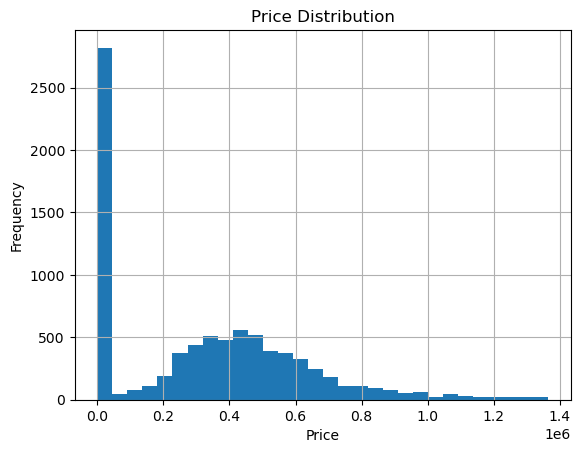

In [966]:
Data['Price'].hist(bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


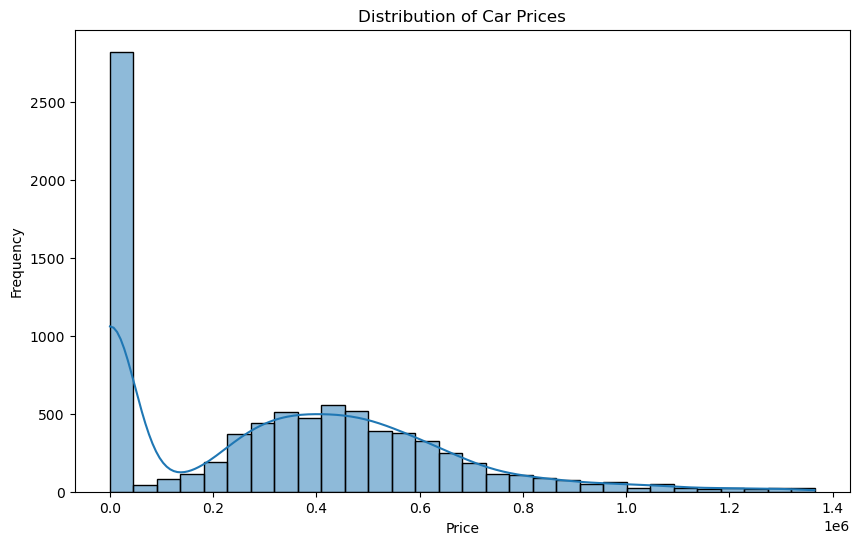

In [967]:
#Data Visualization
#Distribution of Numerical Features: Using histograms to visualize the distribution of numerical features.
# Convert 'Price' to numeric values, forcing errors to NaN
Data['Price'] = pd.to_numeric(Data['Price'], errors='coerce')

# Drop rows with NaN values in 'Price' (optional, based on our preference)
Data = Data.dropna(subset=['Price'])

# Now plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(Data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<AxesSubplot:xlabel='Car_Age', ylabel='Price'>

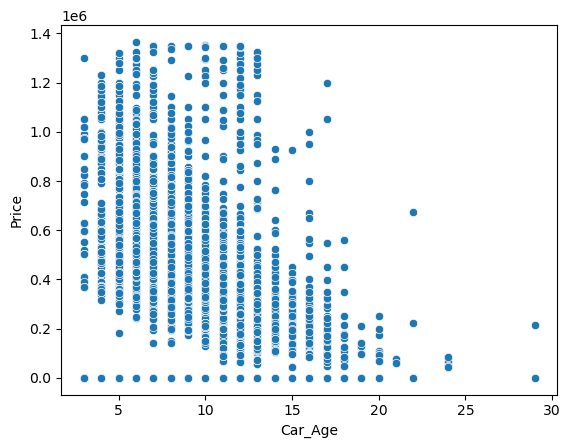

In [968]:
#Bivariate analysis
sns.scatterplot(x='Car_Age', y='Price', data=Data)


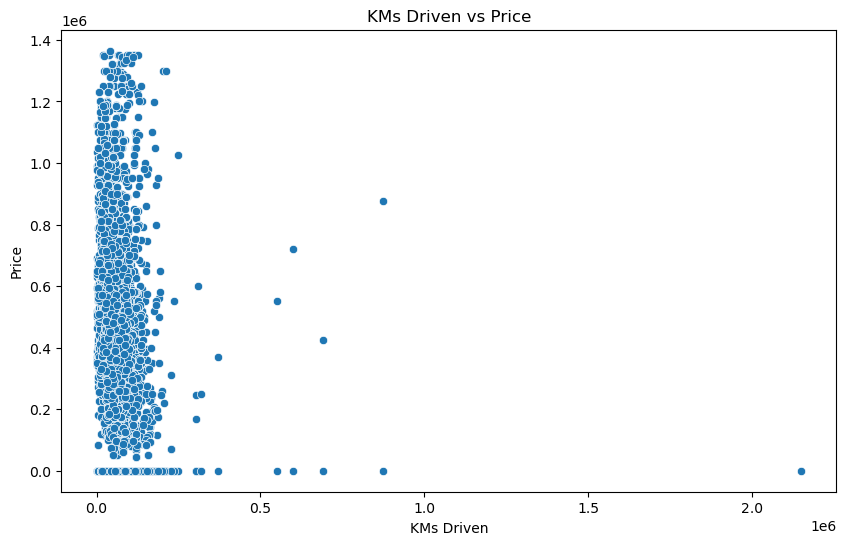

In [969]:
#Scatter Plot: Visualize the relationship between two numerical features.
# Scatter plot of KMs_Driven vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='KMs_Driven', y='Price')
plt.title('KMs Driven vs Price')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.show()

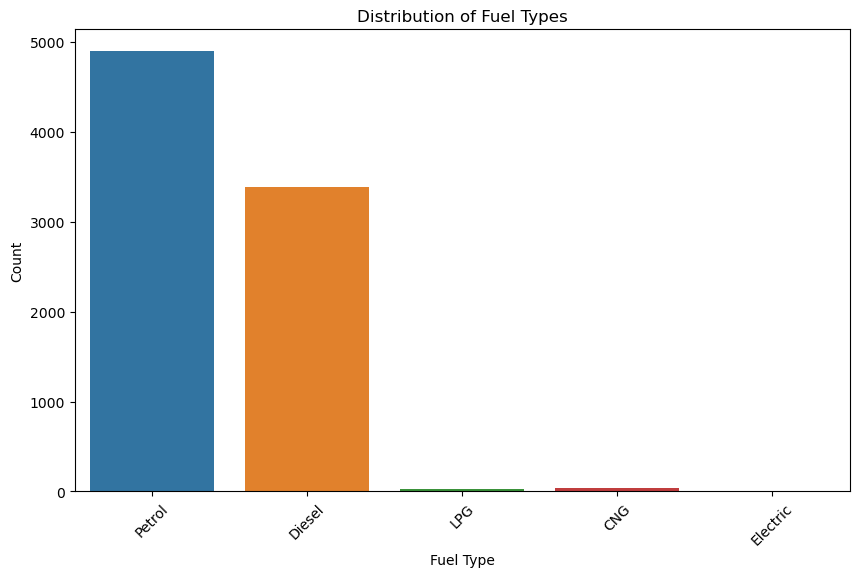

In [970]:
# Categorical Analysis
# Count plot for the 'Fuel' column
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='Fuel')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In the bar chart, we see the distribution of various fuel types for the vehicles in our dataset. Here's a breakdown of the insights:

Petrol: This fuel type has the highest count, exceeding 3,000. This suggests that petrol vehicles are the most common in the dataset.

Diesel: Diesel vehicles are also quite common, with over 2,000 entries, making them the second most frequent fuel type after petrol.

Other Fuel Types (LPG, CNG, Electric): These fuel types have very low counts, close to zero compared to petrol and diesel. This indicates that vehicles with these alternative fuel types are rare in our dataset.

Key Takeaways

Market Composition: Petrol and diesel vehicles dominate the dataset, which may reflect general market trends or the specific focus of our data collection.

Low Representation of Alternative Fuels: The small counts of LPG, CNG, and electric vehicles suggest limited representation of these types. This might impact analyses if you want to include these fuels in comparative studies due to sample size limitations.

Further Analysis: It may be valuable to investigate other factors, such as vehicle age, mileage, or brand, in relation to fuel type to gain deeper insights into each category.

<AxesSubplot:>

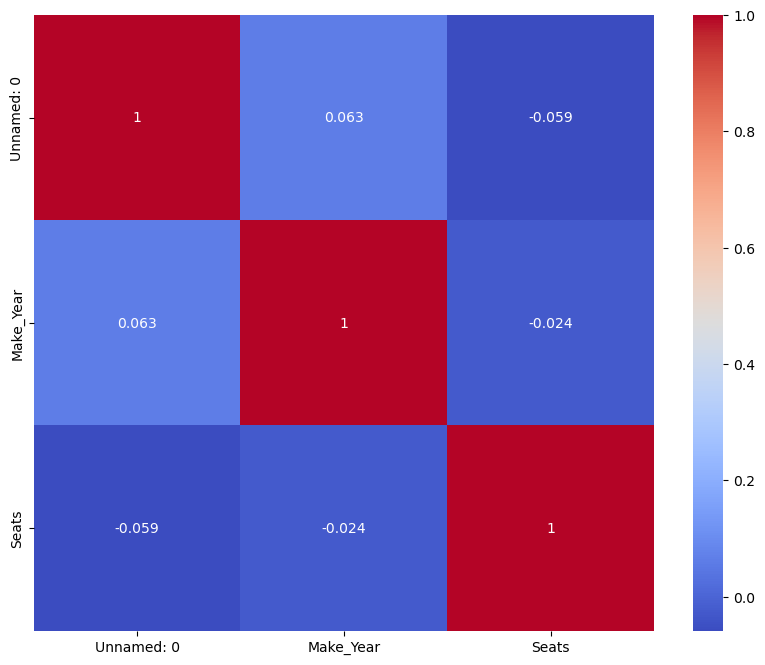

In [971]:
#Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')


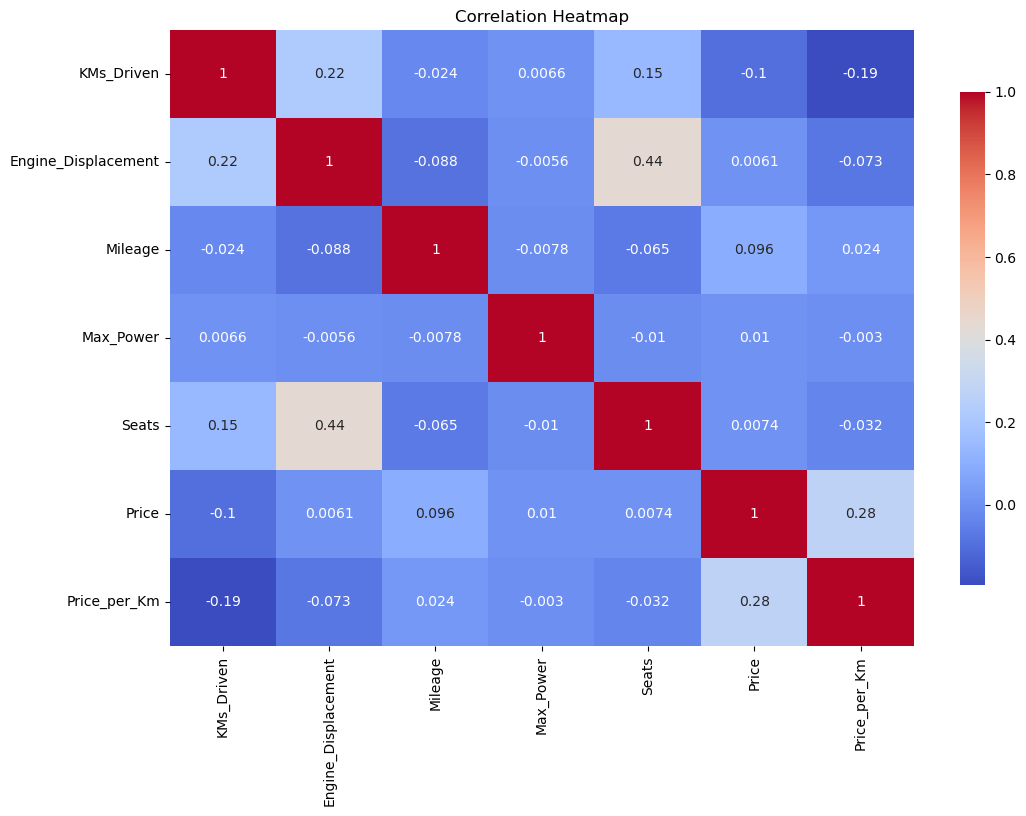

In [972]:
#Correlation Analysis
#Correlation Heatmap to visualize the correlation between numerical features.
# Select only numeric columns
numeric_cols = Data.select_dtypes(include=['float64', 'int64']).columns
Data_numeric = Data[numeric_cols]

# Drop rows with missing values
Data_numeric = Data_numeric.dropna()

# Compute the correlation matrix
corr_matrix = Data_numeric.corr()

# Plot heatmap with optimized settings
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()


4. ***MODEL DEVELOPMENT***

1. **Modeling for Optimal Pricing (Regression)**


To predict the optimal price for a used car based on features such as Brand, Model, KMs_Driven, Make_Year, and more.

Steps:

*Feature Selection:* Choose relevant features for pricing prediction (you might want to remove highly correlated features or irrelevant columns).

*Splitting Data:* Splitting data into training and test sets (typically an 80/20 or 70/30 split).

*Modeling:* Starting with a basic regression model and gradually improve it.

*Linear Regression:* Formulate a good baseline to understand relationships between variables.

*Random Forest/Decision Trees:* For capturing non-linear relationships.

*XGBoost/LightGBM:* More advanced model to handle complex data well and often give better results.

*Evaluation:* Use of metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² to evaluate the model's performance.

In [973]:
# Check the cleaned data
Data.head()

,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,Torque,...,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price,Car_Age,Price_per_Km
0,2020 Maruti Swift Dzire,2019,Petrol,11935.0,1197.0,1st Owner,Manual,21.21,81.8,113Nm,...,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,680000.0,5,56.975283
1,2016 Nissan Terrano,2016,Diesel,74555.0,1461.0,2nd Owner,Manual,20.45,83.8,200Nm,...,5 Speed,FWD,Power,Disc,Drum,14 Seconds,K9K Diesel Engine,470500.0,8,6.310777
2,2020 Maruti Swift Dzire,2019,Petrol,9379.0,1197.0,1st Owner,Manual,21.21,81.8,113Nm,...,5 Speed,FWD,Power,Disc,Drum,12.6 Seconds,K Series VVT Engine,675000.0,5,71.969293
3,2018 Maruti Swift,2018,Diesel,31824.0,1248.0,1st Owner,Manual,28.40,74.0,190Nm,...,5,FWD,Power,Disc,Drum,19,DDiS 190 Engine,600000.0,6,18.853695
4,2017 Maruti Baleno,2017,Petrol,49072.0,1197.0,1st Owner,Manual,21.01,81.8,113Nm,...,5 Speed,FWD,Electric,Disc,Drum,12.36 seconds,1.2L VVT Engine,610000.0,7,12.430714


In [974]:
#Feature Selection to reduce multicollinearity and improve model interpretability. 
# Since we've already performed correlation analysis (via the heatmap), we can drop features that are highly correlated
#(Engine_Displacement and Mileage might be correlated, so only one should be kept).

correlation_threshold = 0.85
corr_matrix = Data.corr()
upper_triangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column].abs() > correlation_threshold)]
Data.drop(columns=to_drop, inplace=True)


In [975]:
#Split the Data for Training
X = Data.drop(columns=['Price'])
y = Data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [976]:
# Check for missing data in X_train
print(X_train.isnull().sum())


Brand                  0
Make_Year              0
Fuel                   0
KMs_Driven             0
Engine_Displacement    0
No_Of_Owner            0
Transmission           0
Mileage                0
Max_Power              0
Torque                 0
Seats                  0
Color                  0
Gear_Box               0
Drive_Type             0
Steering_Type          0
Front_Brake_Type       0
Rear_Brake_Type        0
Acceleration           0
Engine_Type            0
Price_per_Km           0
dtype: int64


4.1. Splitting Data into Training and Test Sets

In [977]:
# Define the features (X) and target variable (y)
X = Data.drop(columns=['Price'])
y = Data['Price']

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print(X_train.shape, X_test.shape)


(6674, 20) (1669, 20)


To avoid getting error: ValueError: could not convert string to float: 'Ford EcoSport 1.5 DV5', occurs because Linear Regression (or any other model from scikit-learn that expects numeric inputs) is trying to use a string value in the dataset. 

In our case, it seems that one of our feature columns (possibly Car_Name or another categorical column) contains string values such as car models ('Ford EcoSport 1.5 DV5'), which cannot be directly used by the regression model. So, we should:

*Steps to fix this:*


- Identify categorical columns: You need to convert categorical columns (e.g., Car_Name, Fuel_Type, Transmission, etc.) into numerical values using encoding techniques like One-Hot Encoding or Label Encoding.

- Handle the Car_Name column: If the Car_Name column is present, it likely needs to be dropped because it's not a feature that can directly help with the price prediction. However, if you want to keep it, you can apply encoding.

- Apply One-Hot Encoding: One-Hot Encoding converts categorical variables into a series of binary (0/1) columns. This way, you can represent each category as a separate column.

- Apply Label Encoding: This technique assigns a unique numeric value to each category but can be less effective for models like linear regression, as it assigns an ordinal relationship that may not exist.

In [978]:
Data.columns

Index(['Brand', 'Make_Year', 'Fuel', 'KMs_Driven', 'Engine_Displacement',
       'No_Of_Owner', 'Transmission', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Color', 'Gear_Box', 'Drive_Type', 'Steering_Type',
       'Front_Brake_Type', 'Rear_Brake_Type', 'Acceleration', 'Engine_Type',
       'Price', 'Price_per_Km'],
      dtype='object')

4.2. Baseline Linear Regression

In [979]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'Data' is your DataFrame
# Check data types first
print(Data.dtypes)


Brand                   object
Make_Year                int32
Fuel                    object
KMs_Driven             float64
Engine_Displacement    float64
No_Of_Owner             object
Transmission            object
Mileage                float64
Max_Power              float64
Torque                  object
Seats                  float64
Color                   object
Gear_Box                object
Drive_Type              object
Steering_Type           object
Front_Brake_Type        object
Rear_Brake_Type         object
Acceleration            object
Engine_Type             object
Price                  float64
Price_per_Km           float64
dtype: object


In [980]:

# Step 1: Convert 'Torque' to string before applying str.extract
Data['Torque'] = Data['Torque'].astype(str).str.extract('(\d+)', expand=False)

# Similarly, convert 'Max_Power' and 'Mileage' to strings before extracting numeric values
Data['Max_Power'] = Data['Max_Power'].astype(str).str.extract('(\d+)', expand=False)
Data['Mileage'] = Data['Mileage'].astype(str).str.extract('(\d+)', expand=False)

# Convert extracted values to float
Data['Torque'] = Data['Torque'].astype(float)
Data['Max_Power'] = Data['Max_Power'].astype(float)
Data['Mileage'] = Data['Mileage'].astype(float)

# Step 2: Apply One-Hot Encoding to categorical columns
categorical_columns = [
    'Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type', 
    'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type'
]

# Apply One-Hot Encoding to categorical columns
Data_encoded = pd.get_dummies(Data, columns=categorical_columns, drop_first=True)

# Step 3: Separate features (X) and target (y)
X = Data_encoded.drop(columns=['Price'])  # Assuming 'Price' is the target column
y = Data_encoded['Price']

In [981]:
# Step 4: Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [982]:
# Step 5: Create and train the model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


ValueError: could not convert string to float: 'First '

In [ ]:
# Step 6: Make predictions on the test set
y_pred = lr_model.predict(X_test)

Explanation:

MAE (Mean Absolute Error): The average of the absolute differences between the predicted and actual values. It gives you an idea of how much the predictions deviate from the true values on average.

MSE (Mean Squared Error): The average of the squared differences between the predicted and actual values. It penalizes larger errors more than MAE.

R² (Coefficient of Determination): This shows how well the model explains the variance in the target variable. A higher R² value indicates a better fit.

In [577]:
#Advanced Models: Random Forest & Decision Trees


4.3. Random Forest

In [694]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")


ValueError: could not convert string to float: '8.6 Seconds'

4.4. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: {mae_dt}")
print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R²: {r2_dt}")


In [578]:
#Advanced Models: XGBoost and LightGBM

4.5. XGBoost

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R²: {r2_xgb}")


4.6. LightGBM

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM MAE: {mae_lgb}")
print(f"LightGBM MSE: {mse_lgb}")
print(f"LightGBM R²: {r2_lgb}")


5. ***MODEL EVALUATION***

In [ ]:
models = {
    "Linear Regression": (mae, mse, r2),
    "Random Forest": (mae_rf, mse_rf, r2_rf),
    "Decision Tree": (mae_dt, mse_dt, r2_dt),
    "XGBoost": (mae_xgb, mse_xgb, r2_xgb),
    "LightGBM": (mae_lgb, mse_lgb, r2_lgb),
}

for model_name, metrics in models.items():
    print(f"{model_name} - MAE: {metrics[0]}, MSE: {metrics[1]}, R²: {metrics[2]}")


Summary of Steps:

Feature Selection: Choose relevant features and remove highly correlated or irrelevant ones.

Data Splitting: Split data into training and testing sets.

Modeling: Start with a baseline model (Linear Regression) and improve using more complex models like Random Forest, Decision Trees, XGBoost, or LightGBM.

Evaluation: Compare models using metrics like MAE, MSE, and R² to determine the best performing model.

In [ ]:
#

In [569]:
# Check which columns are numeric
numeric_columns = X_train.select_dtypes(include=['number']).columns

# Check which columns are categorical
categorical_columns = X_train.select_dtypes(exclude=['number']).columns

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: Index(['Make_Year', 'KMs_Driven', 'Engine_Displacement', 'No_Of_Owner',
       'Mileage', 'Max_Power', 'Seats', 'Car_Age', 'Price_per_Km'],
      dtype='object')
Categorical Columns: Index(['Brand', 'Fuel', 'Transmission', 'Torque', 'Color', 'Gear_Box',
       'Drive_Type', 'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type',
       'Acceleration', 'Engine_Type'],
      dtype='object')


In [570]:
from sklearn.impute import SimpleImputer

# For Numeric Columns, impute using the median
numeric_imputer = SimpleImputer(strategy='median')
X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])

# For Categorical Columns, impute using the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_columns] = categorical_imputer.fit_transform(X_train[categorical_columns])


In [571]:
#Select and Train Models. We shall start with simple models like Linear Regression for a baseline, then try advanced models like Random Forest.

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Ford EcoSport 1.5 DV5'